Setup
======
First let's get some data to play around with.  Say we have total electricity data (GWe) from two different simulators (sim0, sim1) as a function of time [year] and reactor type (LWR, FR).

In [52]:
%matplotlib inline
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
mpl.rc('font', family='serif', size=18)
mpl.rc('savefig', bbox='tight')
mpl.rc('figure', figsize=(12, 9))

make_fname_safe = lambda s: s.lower().replace(' ', '-')

In [82]:
def time_plot_post(xlabel='Time [years]', ylabel=None, title=None, ymax=None):
    ax = plt.axis()
    plt.axis([t[0], t[-1], 0.0, ymax or ax[3]])
    plt.xticks(np.linspace(t[0], t[-1], 5))
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend(loc=0)
    if title is not None:
        fbase = make_fname_safe(title)
        plt.savefig(fbase + '.eps')
        plt.savefig(fbase + '.png')

In [53]:
from collections import namedtuple
gpy = namedtuple('gpy', ['gp', 'y'])
models = {}

In [54]:
S = 2
t = np.arange(2010, 2211)
tsims = np.concatenate([t]*S)

# simulator 0, DYMOND
gwe_lwr_sim0 = np.array([0, 0, 0, 0, 0, 0, 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9, 
                         10.8, 11.7, 12.6, 13.5, 16.87, 19.65, 23.18, 26.85, 30.37, 33.15, 
                         36.68, 39.45, 43.87, 46.65, 50.18, 53.85, 57.37, 60.15, 63.68, 67.35, 
                         70.87, 73.65, 78.08, 80.85, 84.37, 88.05, 91.58, 94.35, 97.87, 100.65, 
                         104.18, 106.95, 110.47, 114.15, 117.68, 120.45, 123.97, 127.65, 
                         131.18, 133.95, 138.37, 141.16, 144.67, 148.35, 148.5, 148.5, 148.5, 
                         148.5, 148.5, 148.5, 148.5, 148.5, 148.5, 148.5, 148.5, 148.5, 148.5, 
                         148.5, 148.5, 148.5, 148.5, 148.5, 148.5, 148.5, 148.5, 148.5, 148.5, 
                         148.5, 148.5, 148.5, 147.6, 146.7, 145.8, 144.9, 144, 143.1, 142.2, 
                         141.3, 140.4, 139.5, 137.7, 136.8, 135.9, 135, 131.63, 128.85, 125.32, 
                         121.65, 118.13, 115.35, 111.82, 109.05, 104.63, 101.85, 98.32, 94.65, 
                         91.13, 88.35, 84.82, 81.15, 77.63, 74.85, 70.42, 67.65, 64.13, 60.45, 
                         56.92, 54.15, 50.63, 47.85, 44.32, 41.55, 38.03, 34.35, 30.82, 28.05, 
                         24.53, 20.85, 17.32, 14.55, 10.13, 7.35, 3.82, 1.5E-01, 0, 0, 0, 0, 0, 
                         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
                         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                         0, 0, 0, 0, 0, 0, 0, 0]) + \
               np.array([90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 
                         90, 90, 90, 87.53, 85.65, 83.02, 81.15, 78.53, 76.65, 74.02, 72.15, 
                         69.53, 67.65, 65.02, 63.15, 60.53, 58.65, 56.02, 54.15, 51.53, 49.65,
                         47.02, 45.15, 42.53, 40.65, 38.02, 36.15, 33.53, 31.65, 29.02, 27.15,
                         24.53, 22.65, 20.02, 18.15, 15.53, 13.65, 11.02, 9.15, 6.53, 4.65, 
                         2.02, 1.5E-01, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
                         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
                         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
                         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                         0, 0, 0, 0, 0, 0, 0, 0])
gwe_fr_sim0 = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
                        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.33, 0.36, 0.69, 
                        1.05, 1.41, 1.77, 2.13, 2.49, 2.85, 2.88, 3.21, 3.57, 3.93, 3.96, 
                        4.29, 4.65, 5.01, 5.37, 5.73, 5.76, 7.2, 8.64, 10.23, 12, 13.47, 15.24,
                        16.71, 18.48, 19.95, 21.75, 23.55, 25.32, 26.79, 28.59, 30.39, 32.19, 
                        33.99, 35.79, 37.62, 39.75, 41.55, 43.35, 45.18, 47.31, 49.14, 51.27, 
                        54.15, 57.03, 59.94, 62.82, 65.7, 68.94, 71.82, 75.06, 77.94, 81.18, 
                        85.14, 88.05, 91.29, 94.5, 100.08, 105.18, 111.18, 117.06, 123.12, 
                        128.22, 134.25, 139.38, 146.49, 151.62, 157.68, 163.86, 169.95, 
                        175.41, 181.77, 187.98, 194.07, 199.53, 206.97, 212.49, 218.85, 
                        225.09, 231.51, 237.33, 243.72, 249.57, 255.96, 261.81, 268.26, 275.13,
                        281.58, 287.4, 294.18, 301.08, 307.83, 313.71, 321.54, 327.72, 334.5, 
                        332.54, 327.2, 333.49, 336.29, 348.89, 351.74, 362.82, 365.72, 370.02, 
                        373.65, 377.58, 381.21, 385.14, 388.77, 392.73, 396.69, 400.65, 404.61,
                        408.6, 412.89, 416.88, 421.2, 425.49, 429.48, 433.8, 438.12, 442.47, 
                        447.12, 451.47, 456.12, 460.47, 465.15, 469.83, 474.51, 479.22, 484.23,
                        488.94, 493.95, 498.66, 503.7, 508.74, 513.78, 518.85, 524.22, 529.29, 
                        534.69, 540.09, 545.49, 550.89, 556.32, 562.05, 567.48, 573.24, 579, 
                        584.76, 590.55, 596.64, 602.43, 608.55, 614.67, 620.79, 626.94])
gwe_sim0 = gwe_lwr_sim0 + gwe_fr_sim0

# simulator 1, Cyclus
gwe_lwr_sim1 = np.array([94, 94, 94, 94, 94, 95, 96, 97, 98, 99, 100, 103, 104, 105, 106, 108, 
                         108, 109, 108, 109, 113, 116, 121, 124, 128, 131, 134, 139, 143, 146, 
                         151, 149, 152, 151, 156, 155, 158, 159, 161, 162, 166, 165, 169, 169, 
                         172, 170, 175, 175, 178, 181, 181, 181, 184, 186, 187, 189, 191, 191, 
                         195, 194, 192, 191, 189, 186, 183, 183, 180, 178, 179, 173, 173, 173, 
                         172, 169, 167, 165, 162, 161, 158, 156, 157, 157, 156, 155, 157, 155, 
                         154, 154, 149, 150, 151, 151, 150, 149, 148, 145, 145, 143, 142, 142, 
                         138, 134, 129, 127, 122, 119, 116, 111, 108, 109, 103, 101, 96, 94, 
                         88, 86, 80, 78, 73, 71, 64, 63, 58, 55, 51, 49, 43, 43, 40, 37, 33, 
                         30, 25, 22, 18, 14, 10, 7, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
                         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
                         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
                         0, 0, 0], dtype='f8')
gwe_fr_sim1 = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.4, 0.4, 0.8, 1.2, 
                        1.6, 2, 2.4, 2.8, 3.2, 3.2, 3.6, 4, 4, 4.4, 4.8, 4.8, 5.6, 5.6, 6.4, 
                        8, 9.2, 11.2, 13.2, 14.8, 16.8, 18, 20.4, 22, 19.2, 26, 25.6, 29.6, 
                        31.6, 28.8, 35.6, 35.2, 39.6, 39.6, 38.8, 45.6, 45.2, 49.6, 49.6, 
                        48.8, 53.6, 53.2, 62, 63.2, 63.6, 69.6, 69.6, 78.4, 80, 80.4, 86.8, 
                        87.6, 96.4, 98, 98.8, 105.2, 108, 118.8, 124, 127.2, 136.4, 138, 
                        150.4, 155.2, 159.2, 168, 170, 151.2, 188, 191.2, 194, 202.8, 184.8,
                        222, 226.4, 221.2, 238, 219.6, 256.4, 260, 223.2, 250, 254, 290, 
                        296.4, 258, 313.6, 289.2, 266.4, 331.2, 294.4, 350.8, 327.6, 303.2, 
                        370, 332.4, 382.8, 357.2, 330.4, 319.6, 353.2, 380.8, 330.8, 350.8, 
                        341.2, 374.8, 389.6, 352.4, 340, 364, 301.6, 410.8, 365.2, 364.4, 
                        388.8, 328.8, 421.2, 378, 390.4, 414.8, 357.2, 446, 406.4, 418.8, 
                        443.2, 388.8, 462.8, 435.2, 425.6, 472.8, 422.4, 489.6, 465.2, 447.2, 
                        454.4, 410.4, 516, 472.8, 482, 488.8, 593.6, 588.4, 509.2, 518.8, 
                        525.6, 611.6, 619.2, 546.4, 522.4, 649.2, 644, 651.2, 585.6, 562.8, 
                        670.4, 677.6, 525.6])
gwe_sim1 = gwe_lwr_sim1 + gwe_fr_sim1

In [4]:
def gwe_plot(t, lwr, fr, sim, colors=('purple', 'green')):
    plt.stackplot(t, lwr, fr, colors=colors)
    ax = plt.axis()
    plt.axis([t[0], t[-1], 0.0, ax[3]])
    plwr = mpatches.Patch(color=colors[0], label='LWR')
    pfr = mpatches.Patch(color=colors[1], label='FR')
    plt.xticks(np.linspace(t[0], t[-1], 5))
    plt.legend(handles=[plwr, pfr], loc='upper left')
    plt.xlabel('Time [years]')
    plt.ylabel('Generated Power [GWe]')
    plt.title(sim)
    fbase = 'gwe-' + sim.lower()
    plt.savefig(fbase + '.eps')
    plt.savefig(fbase + '.png')

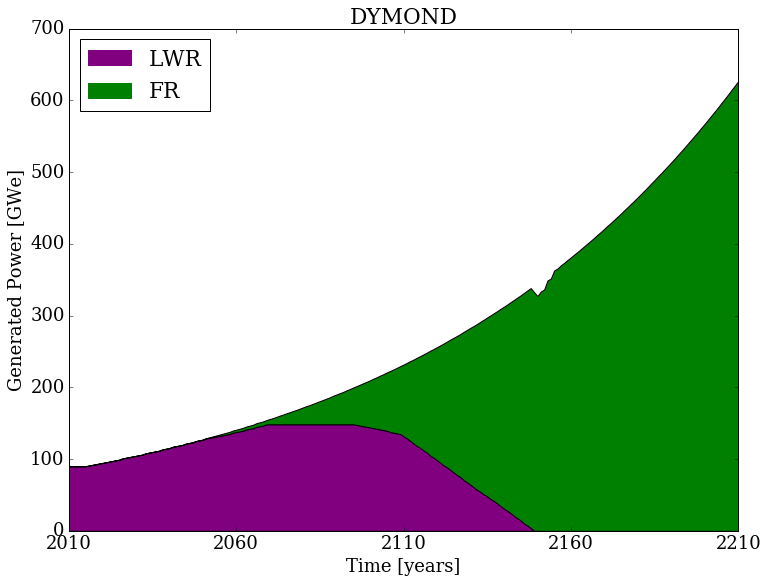

In [58]:
gwe_plot(t, gwe_lwr_sim0, gwe_fr_sim0, 'DYMOND')

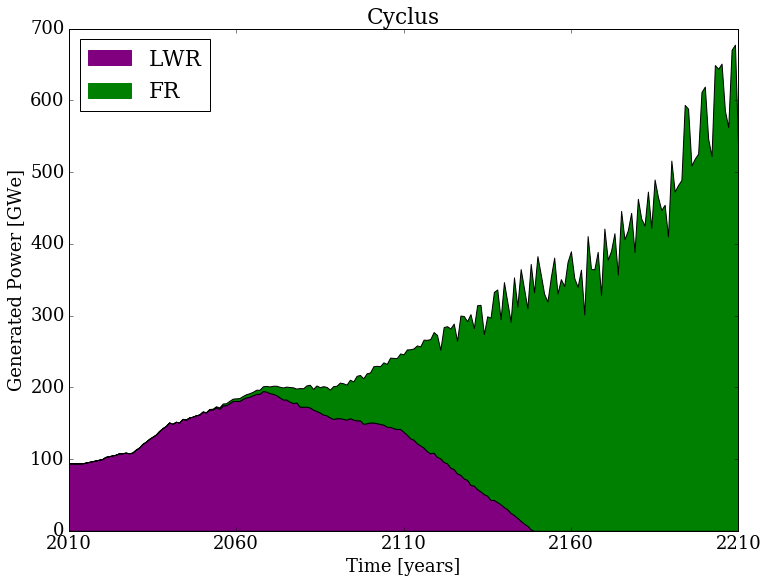

In [59]:
gwe_plot(t, gwe_lwr_sim1, gwe_fr_sim1, 'Cyclus')

Gaussin Process Models
=============
Now let's create gaussian process models across the simulators.

In [60]:
import george
import george.kernels
from george.kernels import ExpSquaredKernel
import scipy.optimize as op

In [61]:
# Set up the Gaussian process.
def init_gp(t, y, yerr):
    y_mean = np.mean(y)
    kernel = float(y_mean) * ExpSquaredKernel(1.0)
    gp = george.GP(kernel, mean=y_mean)
    gp.compute(t, yerr=yerr, sort=False)
    return gp

def negloglikelihood(gp, y, hyperparams):
    gp.kernel[:] = hyperparams
    ll = gp.lnlikelihood(y, quiet=True)
    return -ll if np.isfinite(ll) else 1e25  # mask infinites

def grad_negloglikelihood(gp, y, hyperparams):
    gp.kernel[:] = hyperparams
    gll = gp.grad_lnlikelihood(y, quiet=True)
    #gll[~np.isfinite(gll)] = 0.0
    return -gll

def optimize_hyperparams(gp, y):
    hp0 = gp.kernel.vector
    # form some closures
    nll = lambda hp: negloglikelihood(gp, y, hp)
    grad_nll = lambda hp: grad_negloglikelihood(gp, y, hp)
    results = op.minimize(nll, hp0, jac=grad_nll)
    gp.kernel[:] = results.x
    
def model(t, y, tstar, yerr=1e-6, key=None):
    gp = init_gp(t, y, yerr)
    optimize_hyperparams(gp, y)
    mu, cov = gp.predict(y, tstar)
    std = np.sqrt(np.diag(cov))
    models[key] = gpy(gp, y)
    return mu, std, gp

In [62]:
def model_plot(t, y, yerr, tpred, mu, std, title=None, ymax=None, show_title=True):
    fig = plt.figure(figsize=(8, 8))
    T = len(t) / 2
    plt.errorbar(t[:T], y[:T], yerr if yerr is None else yerr[:T], fmt='r.', label='DYMOND')
    plt.errorbar(t[T:], y[T:], yerr if yerr is None else yerr[T:], fmt='rx', label='Cyclus')
    plt.plot(tpred, mu, 'k-', label='model')
    plt.fill_between(tpred, mu - 2*std, mu + 2*std, color='gray')
    ax = plt.axis()
    plt.axis([tpred[0], tpred[-1], 0.0, ymax or ax[3]])
    plt.xticks(np.linspace(tpred[0], tpred[-1], 5))
    plt.legend(loc=0)
    plt.xlabel('Time [year]')
    plt.ylabel('Generated Power [GWe]')
    if title and show_title:
        plt.title(title)
    fbase = 'gwe-model-' + (title or '').lower().replace(' ', '-')
    plt.savefig(fbase + '.eps')
    plt.savefig(fbase + '.png')

In [63]:
gwe_lwr_y = np.concatenate([gwe_lwr_sim0, gwe_lwr_sim1])
gwe_lwr_mu, gwe_lwr_std, gwe_lwr_gp = model(tsims, gwe_lwr_y, t, key='lwr')
gwe_lwr_gp.kernel.vector

/home/scopatz/.local/lib/python3.5/site-packages/george-0.2.1-py3.5-linux-x86_64.egg/george/kernels.py:85: RuntimeWarning: overflow encountered in exp
  self.pars = np.exp(v)
/home/scopatz/.local/lib/python3.5/site-packages/george-0.2.1-py3.5-linux-x86_64.egg/george/kernels.py:81: RuntimeWarning: divide by zero encountered in log
  return np.log(self.pars)
/home/scopatz/.local/lib/python3.5/site-packages/george-0.2.1-py3.5-linux-x86_64.egg/george/kernels.py:137: RuntimeWarning: invalid value encountered in multiply
  return g * self.vector_gradient[None, None, :]
/home/scopatz/.local/lib/python3.5/site-packages/george-0.2.1-py3.5-linux-x86_64.egg/george/kernels.py:81: RuntimeWarning: divide by zero encountered in log
  return np.log(self.pars)
/home/scopatz/.local/lib/python3.5/site-packages/george-0.2.1-py3.5-linux-x86_64.egg/george/kernels.py:85: RuntimeWarning: overflow encountered in exp
  self.pars = np.exp(v)
/home/scopatz/.local/lib/python3.5/site-packages/george-0.2.1-py3.5-lin

array([ 4.41214981,  0.        ])

/home/scopatz/miniconda/lib/python3.5/site-packages/ipykernel/__main__.py:4: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/scopatz/miniconda/lib/python3.5/site-packages/ipykernel/__main__.py:5: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


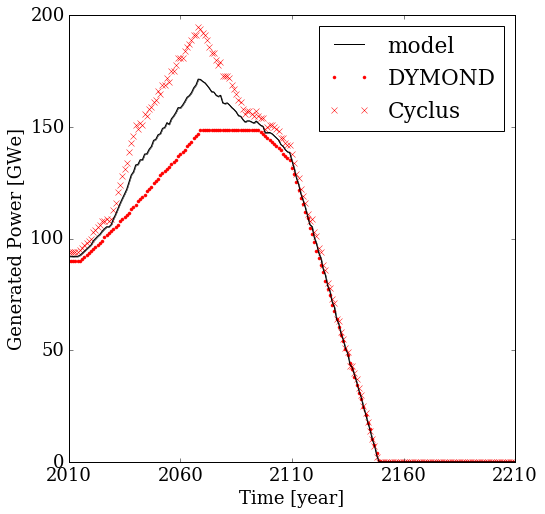

In [64]:
model_plot(tsims, gwe_lwr_y, None, t, gwe_lwr_mu, gwe_lwr_std, title='LWR', show_title=False)

In [65]:
gwe_fr_y = np.concatenate([gwe_fr_sim0, gwe_fr_sim1])
gwe_fr_mu, gwe_fr_std, gwe_fr_gp = model(tsims, gwe_fr_y, t, key='fr')
gwe_fr_gp.kernel.vector

/home/scopatz/.local/lib/python3.5/site-packages/george-0.2.1-py3.5-linux-x86_64.egg/george/kernels.py:81: RuntimeWarning: divide by zero encountered in log
  return np.log(self.pars)
/home/scopatz/.local/lib/python3.5/site-packages/george-0.2.1-py3.5-linux-x86_64.egg/george/kernels.py:81: RuntimeWarning: divide by zero encountered in log
  return np.log(self.pars)
/home/scopatz/.local/lib/python3.5/site-packages/george-0.2.1-py3.5-linux-x86_64.egg/george/kernels.py:81: RuntimeWarning: divide by zero encountered in log
  return np.log(self.pars)


array([ 5.26781469,  0.        ])

/home/scopatz/miniconda/lib/python3.5/site-packages/ipykernel/__main__.py:4: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/scopatz/miniconda/lib/python3.5/site-packages/ipykernel/__main__.py:5: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


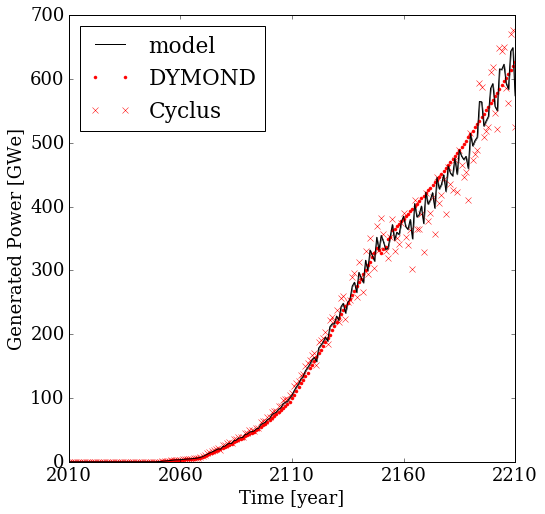

In [66]:
model_plot(tsims, gwe_fr_y, None, t, gwe_fr_mu, gwe_fr_std, title='FR', show_title=False)

In [67]:
gwe_y = np.concatenate([gwe_sim0, gwe_sim1])
gwe_mu, gwe_std, gwe_gp = model(tsims, gwe_y, t, key='total')
gwe_gp.kernel.vector

/home/scopatz/.local/lib/python3.5/site-packages/george-0.2.1-py3.5-linux-x86_64.egg/george/kernels.py:85: RuntimeWarning: overflow encountered in exp
  self.pars = np.exp(v)
/home/scopatz/.local/lib/python3.5/site-packages/george-0.2.1-py3.5-linux-x86_64.egg/george/kernels.py:81: RuntimeWarning: divide by zero encountered in log
  return np.log(self.pars)
/home/scopatz/.local/lib/python3.5/site-packages/george-0.2.1-py3.5-linux-x86_64.egg/george/kernels.py:81: RuntimeWarning: divide by zero encountered in log
  return np.log(self.pars)
/home/scopatz/.local/lib/python3.5/site-packages/george-0.2.1-py3.5-linux-x86_64.egg/george/kernels.py:85: RuntimeWarning: overflow encountered in exp
  self.pars = np.exp(v)
/home/scopatz/.local/lib/python3.5/site-packages/george-0.2.1-py3.5-linux-x86_64.egg/george/kernels.py:81: RuntimeWarning: divide by zero encountered in log
  return np.log(self.pars)


array([ 5.62198687,  0.        ])

/home/scopatz/miniconda/lib/python3.5/site-packages/ipykernel/__main__.py:4: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/scopatz/miniconda/lib/python3.5/site-packages/ipykernel/__main__.py:5: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


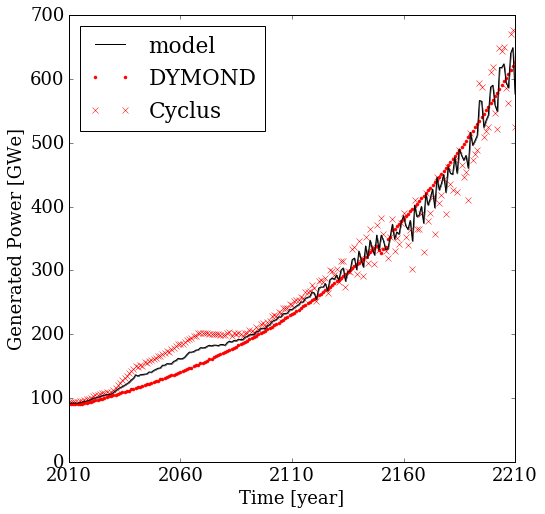

In [68]:
model_plot(tsims, gwe_y, None, t, gwe_mu, gwe_std, title='Total', show_title=False)

## Component models

In [69]:
zero_mu, zero_std, zero_gp = model(t, np.zeros(len(t)), t, key='zeros')
lwr0_mu, lwr0_std, lwr0_gp = model(t, gwe_lwr_sim0, t, key='lwr0')
lwr1_mu, lwr1_std, lwr1_gp = model(t, gwe_lwr_sim1, t, key='lwr1')
fr0_mu, fr0_std, fr0_gp = model(t, gwe_fr_sim0, t, key='fr0')
fr1_mu, fr1_std, fr1_gp = model(t, gwe_fr_sim1, t, key='fr1')
total0_mu, total0_std, total0_gp = model(t, gwe_sim0, t, key='total0')
total1_mu, total1_std, total1_gp = model(t, gwe_sim1, t, key='total1')

/home/scopatz/.local/lib/python3.5/site-packages/george-0.2.1-py3.5-linux-x86_64.egg/george/kernels.py:81: RuntimeWarning: divide by zero encountered in log
  return np.log(self.pars)
/home/scopatz/.local/lib/python3.5/site-packages/george-0.2.1-py3.5-linux-x86_64.egg/george/kernels.py:85: RuntimeWarning: overflow encountered in exp
  self.pars = np.exp(v)
/home/scopatz/miniconda/lib/python3.5/site-packages/ipykernel/__main__.py:32: RuntimeWarning: invalid value encountered in sqrt


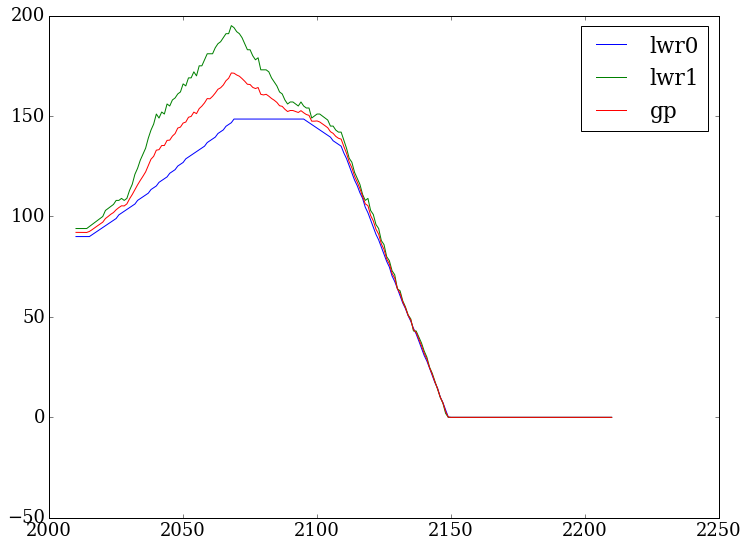

In [70]:
plt.plot(t, lwr0_mu, label='lwr0')
plt.plot(t, lwr1_mu, label='lwr1')
plt.plot(t, gwe_lwr_mu, label='gp')
plt.legend(loc=0)

In [18]:
def rect_l2_dist(gp0, y0, gp1, y1, lower, upper, n=1024):
    """L2 Norm for gaussian processes.
    
    Parameters
    ----------
    gp0 : GP
        The first gaussian process
    gp1 : GP
        The second gaussian process
    lower : number
        The lower bound.
    upper : number
        The upper bound.
    """
    t = np.linspace(lower, upper, n)
    mu0, cov0 = gp0.predict(y0, t)
    np.maximum(mu0, 0.0, out=mu0)
    var0 = np.diag(cov0)
    mu1, cov1 = gp1.predict(y1, t)
    np.maximum(mu1, 0.0, out=mu1)
    var1 = np.diag(cov1)
    grad_t = np.gradient(t)
    res = ((var0 + var1 + (mu0 - mu1)**2)*grad_t).sum()
    return res

In [19]:
rect_l2_dist(lwr0_gp, gwe_lwr_sim0, gwe_lwr_gp, gwe_lwr_y, t[0], t[-1])

17811.016189140635

In [20]:
rect_l2_dist(lwr1_gp, gwe_lwr_sim1, gwe_lwr_gp, gwe_lwr_y, t[0], t[-1])

1517827.667230549

## quad int

In [21]:
from scipy.integrate import quad, quad_explain

In [22]:
def result_x(x, gp0, y0, gp1, y1):
    mu0, cov0 = gp0.predict(y0, x)
    np.maximum(mu0, 0.0, out=mu0)
    var0 = np.diag(cov0)
    mu1, cov1 = gp1.predict(y1, x)
    np.maximum(mu1, 0.0, out=mu1)
    var1 = np.diag(cov1)
    res = ((var0 + var1 + (mu0 - mu1)**2)).sum()
    return res

def quad_l2_dist(gp0, y0, gp1, y1, lower, upper, **kwargs):
    res, err = quad(result_x, lower, upper, args=(gp0, y0, gp1, y1), **kwargs)
    return res

In [23]:
quad_l2_dist(lwr0_gp, gwe_lwr_sim0, gwe_lwr_gp, gwe_lwr_y, t[0], t[-1])

/home/scopatz/miniconda/lib/python3.5/site-packages/scipy/integrate/quadpack.py:357: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)


17863.679392385464

In [24]:
quad_l2_dist(lwr1_gp, gwe_lwr_sim1, gwe_lwr_gp, gwe_lwr_y, t[0], t[-1])

/home/scopatz/miniconda/lib/python3.5/site-packages/scipy/integrate/quadpack.py:357: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)


1522430.893625265

## Trapizodal Integrator

In [25]:
def midpoints(lower, upper, n):
    """find the nth midpoints of the linspace of
    np.linspace(lower, upper, 2**n + 1). This is effectively the same as
    np.linspace(lower, upper, 2**n + 1)[1:-1:2]
    """
    dx = (upper - lower)/(2**n)
    return np.linspace(lower + dx, upper - dx, 2**(n-1))

def pointwise_integrands(t, gp0, y0, gp1, y1):
    """Returns the integrand factors for a tim grid t."""
    mu0, cov0 = gp0.predict(y0, t)
    np.maximum(mu0, 0.0, out=mu0)
    var0 = np.diag(cov0)
    mu1, cov1 = gp1.predict(y1, t)
    np.maximum(mu1, 0.0, out=mu1)
    var1 = np.diag(cov1)
    res = var0 + var1 + (mu0 - mu1)**2
    return res

def trap_result(t, n_p):
    res = np.trapz(n_p, x=t)
    return res

def weave_points(bounds, mids, npoints=None):
    if npoints is None:
        npoints = len(bounds) + len(mids)
    w = np.empty(npoints, float)
    w[::2] = bounds
    w[1:-1:2] = mids
    return w

def trap_l2_dist(gp0, y0, gp1, y1, lower, upper, relerror=1e-5, min_limit=8, max_limit=12):
    """L2 Norm for gaussian processes.
    
    Parameters
    ----------
    gp0 : GP
        The first gaussian process
    gp1 : GP
        The second gaussian process
    lower : number
        The lower bound.
    upper : number
        The upper bound.
    relerror : fraction
        Relative errror, below which we consider the value converged.
    min_limit : int
        Minimum number of iterations, minimum is 2.
    max_limit : int
        Maximum number of iterations, minimum is 2.
    """
    t = np.linspace(lower, upper, 3)
    n_p = pointwise_integrands(t, gp0, y0, gp1, y1)
    results = [trap_result(t[::2], n_p[::2]), trap_result(t, n_p)]
    n = 2
    while (np.abs(1.0 - results[-2]/results[-1]) > relerror or n < min_limit) and n < max_limit:
        t_q = midpoints(lower, upper, n)
        n_q = pointwise_integrands(t_q, gp0, y0, gp1, y1)
        npoints = 2**n + 1
        t = weave_points(t, t_q, npoints)
        n_p = weave_points(n_p, n_q, npoints)
        r = trap_result(t, n_p)
        results.append(r)
        n += 1
    return results[-1]

In [26]:
trap_l2_dist(lwr0_gp, gwe_lwr_sim0, gwe_lwr_gp, gwe_lwr_y, t[0], t[-1])

17819.100573771313

In [27]:
trap_l2_dist(lwr1_gp, gwe_lwr_sim1, gwe_lwr_gp, gwe_lwr_y, t[0], t[-1])

1518051.963312082

# cumulative integral

In [28]:
ci_rect = np.zeros(len(t), float)
ci_quad = np.zeros(len(t), float)
ci_trap = np.zeros(len(t), float)
for i, ti in zip(range(1, len(t)), t):
    ci_rect[i] = rect_l2_dist(lwr1_gp, gwe_lwr_sim1, gwe_lwr_gp, gwe_lwr_y, t[0], ti)
    ci_quad[i] = quad_l2_dist(lwr1_gp, gwe_lwr_sim1, gwe_lwr_gp, gwe_lwr_y, t[0], ti)
    ci_trap[i] = trap_l2_dist(lwr1_gp, gwe_lwr_sim1, gwe_lwr_gp, gwe_lwr_y, t[0], ti)
    if i%10 == 0:
        print(ti)

/home/scopatz/miniconda/lib/python3.5/site-packages/ipykernel/__main__.py:56: RuntimeWarning: invalid value encountered in double_scalars
/home/scopatz/miniconda/lib/python3.5/site-packages/ipykernel/__main__.py:56: RuntimeWarning: invalid value encountered in absolute
/home/scopatz/miniconda/lib/python3.5/site-packages/scipy/integrate/quadpack.py:357: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)


2019
2029
2039
2049
2059
2069
2079
2089
2099
2109
2119
2129
2139
2149
2159
2169
2179
2189
2199
2209


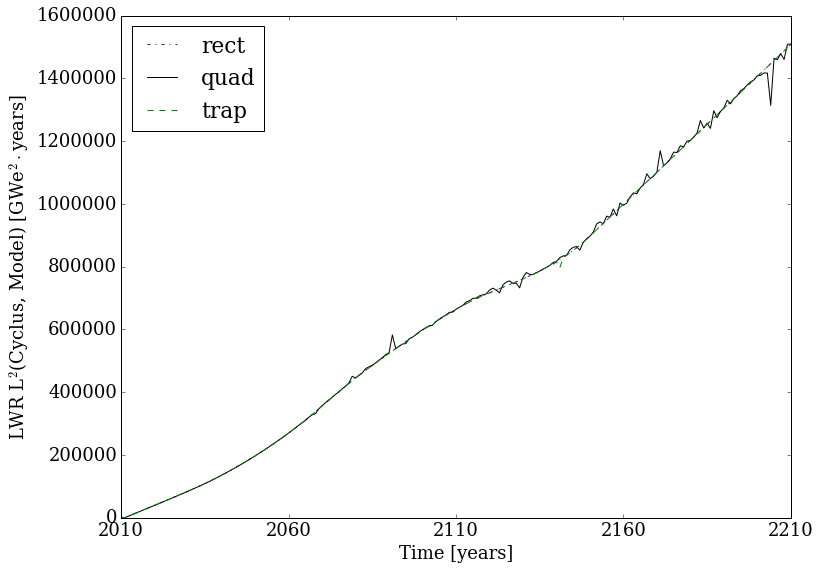

In [80]:
plt.plot(t, ci_rect, color='purple', linestyle='-.', label='rect')
plt.plot(t, ci_quad, 'k-', label='quad')
plt.plot(t, ci_trap, color='green', linestyle='--', label='trap')
time_plot_post(ylabel='LWR L$^2$(Cyclus, Model) [GWe$^2\cdot$years]', title='L2 LWR Cyclus Model

## Distances Measures

In [56]:
def d_trap(key0, key1, lower=None, upper=None, relerror=1e-5, min_limit=8, max_limit=12):
    """distance meaure using trapazoidal function."""
    lower = t[0] if lower is None else lower
    upper = t[-1] if upper is None else upper
    gp0, y0 = models[key0]
    gp1, y1 = models[key1]
    d = trap_l2_dist(gp0, y0, gp1, y1, lower, upper, 
                     relerror=relerror, min_limit=min_limit, max_limit=max_limit)
    return d

In [78]:
print('-'*10)
for key1 in ['lwr', 'fr', 'total']:
    for n in '01':
        key0 = key1 + n
        d = d_trap(key0, key1)
        print('distance from {0} to {1}: {2:.2e}'.format(key0, key1, d))
    print('-'*10)

----------
distance from lwr0 to lwr: 1.78e+04
distance from lwr1 to lwr: 1.52e+06
----------
distance from fr0 to fr: 3.27e+04
distance from fr1 to fr: 1.61e+07
----------
distance from total0 to total: 5.20e+04
distance from total1 to total: 5.58e+04
----------


## contribution

In [72]:
def contrib_trap(comps, total='total', zeros='zeros', relerror=1e-5, min_limit=8, max_limit=12):
    tlen = len(t)
    max_d = np.empty(tlen-1, float)
    results = []
    for comp in comps:
        results.append(np.empty(tlen-1, float))
    for i, ti in enumerate(t[1:]):
        max_d[i] = d_trap(zeros, total, upper=ti, relerror=relerror, min_limit=min_limit, max_limit=max_limit)
        for comp, res in zip(comps, results):
            res[i] = d_trap(comp, total, upper=ti, relerror=relerror, min_limit=min_limit, max_limit=max_limit)
        if i%10 == 0:
            print(ti)
    for res in results:
        res[:] = 1.0 - (res/max_d)
    return results

In [73]:
contribs = contrib_trap(['lwr', 'fr'], min_limit=10)

2011
2021
2031
2041
2051
2061
2071
2081
2091
2101
2111
2121
2131
2141
2151
2161
2171
2181
2191
2201


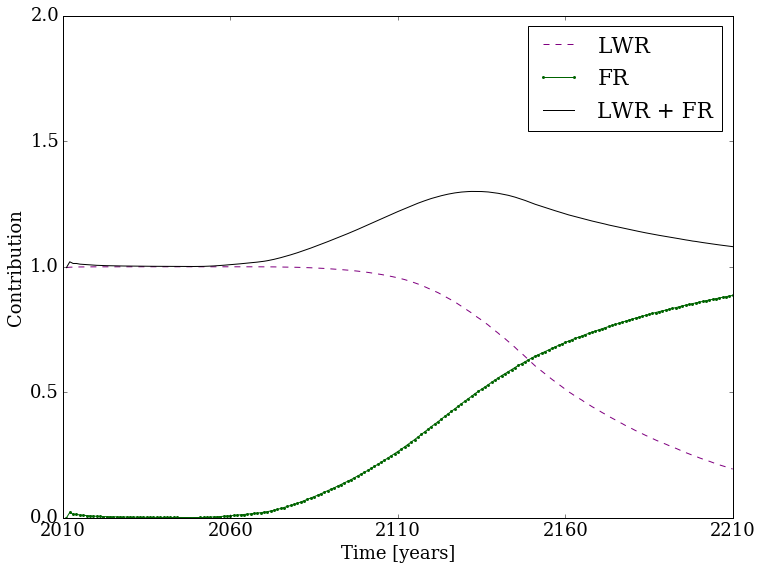

In [102]:
plt.plot(t[1:], contribs[0], color='purple', linestyle='--', label='LWR')
plt.plot(t[1:], contribs[1], color='darkgreen', marker='o', markeredgewidth=0.0, markersize=3, label='FR')
plt.plot(t[1:], contribs[0] + contribs[1], 'k-', label='LWR + FR')
time_plot_post(ylabel='Contribution', title='GP L2 Contribution', ymax=2.0)

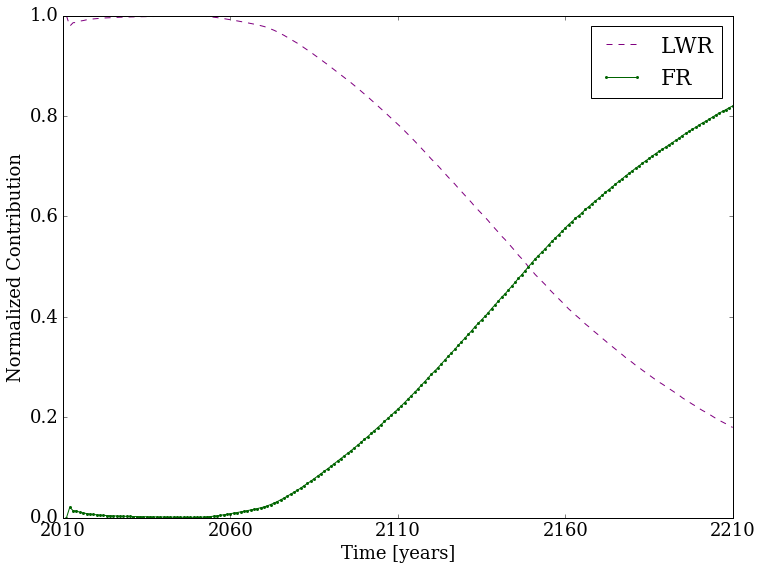

In [103]:
plt.plot(t[1:], contribs[0]/(contribs[0] + contribs[1]), color='purple', linestyle='--', label='LWR')
plt.plot(t[1:], contribs[1]/(contribs[0] + contribs[1]), color='darkgreen', marker='o', 
         markeredgewidth=0.0, markersize=3, label='FR')
time_plot_post(ylabel='Normalized Contribution', title='Norm GP L2 Contribution', ymax=1.0)